In [1]:
import graphistry
import pandas as pd
import numpy as np
import requests

In [2]:
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", username="Girraz", password="_")

In [3]:
import pyTigerGraph as tg

TG_HOST = "https://halal.i.tgcloud.io"
TG_USERNAME= "tigergraph"
TG_PASSWORD="_"
TG_GRAPH ="halal"
TG_SECRET= "gh9urnvt8aa0hk2tppic1r9vck0jmumj"

conn = tg.TigerGraphConnection(host=TG_HOST, graphname=TG_GRAPH, username=TG_USERNAME, password=TG_PASSWORD)

print(conn.getToken(TG_SECRET, "1000000")) #uses a lifetime of 1,000,000 seconds

('u4vb9srq8ljdjudu1lshs5otl4m21t81', 1619576846, '2021-04-28 02:27:26')


In [4]:
query = "ProductManufactureLink"
resultTG = conn.runInstalledQuery(query)
results = resultTG[0]['@@tupleRecords']
ProdMan = pd.DataFrame(results)

In [5]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style('whitegrid')
import pandas as pd
import warnings

In [6]:
ProdMan.head(10)

,src,dest
0,kue wafel isi karamel dan cokelat Chocolate St...,Pt. Aaltje Boga Kulina
1,egg albumen powder AD,Taiyo Food (Tianjin) Co.
2,dehydrated onion,Laiwu Manhing Vegetables Fruits Corporation
3,chinos coklat nanas,CHINOS
4,sodium lactate and sodium acetate blend,HeNan JinDan Lactic Acid Technology Co.
5,freeze dried coffee extract,DeHong Hogood Coffee Co.
6,bandeng presto MAMA YUS,PKOPJPA JAVA FOOD
7,Zona Keripik Tempe Soy Bean Crips,PT. Zoneindo Global
8,Ziboxan WS80 Specification,Deosen Biochemical (Ordos) Ltd.
9,Ziboxan IND40 Specification,Deosen Biochemical (Ordos) Ltd.


In [7]:
ProdMan['src']= ProdMan['src'].str.replace(' ', '_')
ProdMan['dest']= ProdMan['dest'].str.replace(' ', '_')

In [8]:
g_data = nx.from_pandas_edgelist(ProdMan, source='src',target='dest')

In [9]:
#Manufacture
man = ProdMan[['src','dest']].dropna(axis = 0,how = 'any')
man.head()

,src,dest
0,kue_wafel_isi_karamel_dan_cokelat_Chocolate_St...,Pt._Aaltje_Boga_Kulina
1,egg_albumen_powder_AD,Taiyo_Food_(Tianjin)_Co.
2,dehydrated_onion,Laiwu_Manhing_Vegetables_Fruits_Corporation
3,chinos_coklat_nanas,CHINOS
4,sodium_lactate_and_sodium_acetate_blend,HeNan_JinDan_Lactic_Acid_Technology__Co.


In [10]:
mylist = man.values.tolist()
mylist

[['kue_wafel_isi_karamel_dan_cokelat_Chocolate_Stroopwaffel_',
  'Pt._Aaltje_Boga_Kulina'],
 ['egg_albumen_powder_AD', 'Taiyo_Food_(Tianjin)_Co.'],
 ['dehydrated_onion', 'Laiwu_Manhing_Vegetables_Fruits_Corporation'],
 ['chinos_coklat_nanas', 'CHINOS'],
 ['sodium_lactate_and_sodium_acetate_blend',
  'HeNan_JinDan_Lactic_Acid_Technology__Co.'],
 ['freeze_dried_coffee_extract', 'DeHong_Hogood_Coffee_Co.'],
 ['bandeng_presto_MAMA_YUS_', 'PKOPJPA_JAVA_FOOD'],
 ['Zona_Keripik_Tempe_Soy_Bean_Crips_', 'PT._Zoneindo_Global'],
 ['Ziboxan_WS80_Specification', 'Deosen_Biochemical_(Ordos)_Ltd.'],
 ['Ziboxan_IND40_Specification', 'Deosen_Biochemical_(Ordos)_Ltd.'],
 ['Ziboxan_UH_Specification', 'Deosen_Biochemical_(Ordos)_Ltd.'],
 ['Tepung_Sagu_Cap_Hati', 'Bina_Sago_Lestari'],
 ['VANA_BLANCA_32Q', 'Kievit_Indonesia'],
 ['VANA_CAPPA_X760', 'Kievit_Indonesia'],
 ['VANA_BLANCA_60P', 'Kievit_Indonesia'],
 ['Teh_Wangi_Cap_Merak_Djago', 'Kartini_Teh_Nasional'],
 ['Teh_Wangi_Gopek_Etiket_Coklat_', 'Gopek_

In [11]:
g_data.add_edges_from(mylist,weight=1,label="Manufacture")

In [12]:
labels = [i for i in dict(g_data.nodes).keys()]
labels = {i:i for i in dict(g_data.nodes).keys()}
labels

{'kue_wafel_isi_karamel_dan_cokelat_Chocolate_Stroopwaffel_': 'kue_wafel_isi_karamel_dan_cokelat_Chocolate_Stroopwaffel_',
 'Pt._Aaltje_Boga_Kulina': 'Pt._Aaltje_Boga_Kulina',
 'egg_albumen_powder_AD': 'egg_albumen_powder_AD',
 'Taiyo_Food_(Tianjin)_Co.': 'Taiyo_Food_(Tianjin)_Co.',
 'dehydrated_onion': 'dehydrated_onion',
 'Laiwu_Manhing_Vegetables_Fruits_Corporation': 'Laiwu_Manhing_Vegetables_Fruits_Corporation',
 'chinos_coklat_nanas': 'chinos_coklat_nanas',
 'CHINOS': 'CHINOS',
 'sodium_lactate_and_sodium_acetate_blend': 'sodium_lactate_and_sodium_acetate_blend',
 'HeNan_JinDan_Lactic_Acid_Technology__Co.': 'HeNan_JinDan_Lactic_Acid_Technology__Co.',
 'freeze_dried_coffee_extract': 'freeze_dried_coffee_extract',
 'DeHong_Hogood_Coffee_Co.': 'DeHong_Hogood_Coffee_Co.',
 'bandeng_presto_MAMA_YUS_': 'bandeng_presto_MAMA_YUS_',
 'PKOPJPA_JAVA_FOOD': 'PKOPJPA_JAVA_FOOD',
 'Zona_Keripik_Tempe_Soy_Bean_Crips_': 'Zona_Keripik_Tempe_Soy_Bean_Crips_',
 'PT._Zoneindo_Global': 'PT._Zoneindo_G

In [13]:
node2vec = Node2Vec(g_data, dimensions=100, walk_length=16, num_walks=5)

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████| 5/5 [03:03<00:00, 36.65s/it]


In [14]:
n2w_model = node2vec.fit(window=7, min_count=1)

In [15]:
model = node2vec.fit(window=10,min_count=1)

In [16]:
nodeFood =[x for x in ProdMan.src]
nodeFood

['kue_wafel_isi_karamel_dan_cokelat_Chocolate_Stroopwaffel_',
 'egg_albumen_powder_AD',
 'dehydrated_onion',
 'chinos_coklat_nanas',
 'sodium_lactate_and_sodium_acetate_blend',
 'freeze_dried_coffee_extract',
 'bandeng_presto_MAMA_YUS_',
 'Zona_Keripik_Tempe_Soy_Bean_Crips_',
 'Ziboxan_WS80_Specification',
 'Ziboxan_IND40_Specification',
 'Ziboxan_UH_Specification',
 'Tepung_Sagu_Cap_Hati',
 'VANA_BLANCA_32Q',
 'VANA_CAPPA_X760',
 'VANA_BLANCA_60P',
 'Teh_Wangi_Cap_Merak_Djago',
 'Teh_Wangi_Gopek_Etiket_Coklat_',
 'compound_ice_cream_emulsifying_thickener_LD_06A_',
 'Splitted_Palm_Kernel_Olein_Fatty_Acid',
 'Soybean_protein_isolated',
 'Spice_Islands_Indonesia_Bumbu_Dasar_Kuning',
 'Soy_Protein_Isolate_SSPRO_90D_',
 'Soya_Fiber_Protein_BC_990_series_BC_990B_BC_990P_BC_990C_BC_990S_BC_990AZ_BC_990CT_BC_990CRT_BC_990CPT_BC_990L_',
 'Terasi_Udang_atm',
 'Susu_Rasa_Choco_Oreo',
 'Susu_Rasa_Cappucino',
 'dried_razor_clam',
 'Shrimp_Crackers',
 'Sirup_Markisa',
 'Sop_Durian_Topping_Marshmall

In [17]:
embeddings = np.array([model.wv[x] for x in nodeFood])
embeddings

array([[ 0.14966443,  0.46257398,  0.42783564, ..., -0.73472667,
         0.682224  , -0.8101339 ],
       [ 0.13493225, -0.03094447,  0.0512662 , ..., -0.06970833,
         0.12819234, -0.02189898],
       [ 0.04298652,  0.5995971 ,  0.15719579, ...,  0.02339806,
         0.53930086, -0.34259546],
       ...,
       [ 0.06142802,  0.07063731,  0.06078004, ..., -0.05291828,
         0.04434991,  0.04259897],
       [-0.10923531,  0.02937613,  0.0167806 , ..., -0.1302348 ,
        -0.03927109,  0.04801701],
       [ 0.19489062,  0.09907011,  0.16821429, ..., -0.06994374,
        -0.03948038, -0.20485091]], dtype=float32)

In [18]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

2021-03-29 09:51:41.222 WARNING root: 
  command:

    streamlit run C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


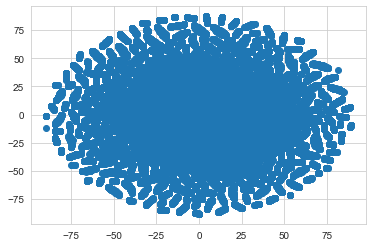

In [19]:
import streamlit as st
figure = plt.figure()

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
st.write(figure)

In [20]:
model.save

<bound method Word2Vec.save of <gensim.models.word2vec.Word2Vec object at 0x000001E91BAEA388>>

In [21]:
model.wv.save_word2vec_format('foodmanufacture.emb')

2021-03-29 09:51:42.069 INFO    gensim.models.utils_any2vec: storing 45603x100 projection weights into foodmanufacture.emb


In [22]:
words = list(model.wv.vocab)
print(words)

['Pear_base', 'Doehler_Food_and_Beverage_Ingredients_(Rizhao)_Co.', 'Orange_Carrot_Base', 'Sweet_potato_juice_concentrate', 'NFC_juice', 'Cucumber_juice_concentrate', 'Tomato_Punch_Base', 'Orange_Base', 'Enfagrow_A_Tahap_3_Susu_Pertumbuhan_Rasa_Madu_Untuk_Anak_Usia_1_3_Tahun', 'Mead_Johnson_Indonesia', 'Sustagen_Premium_Choco_Adult_Nutritional_Milk', 'Enfamil_A_Stage_2_Follow_up_Formula_for_Infant_6_12_months', 'Enfagrow_A_Lactose_free_Growing_Up_Milk_for_Children_1_3_years_old_with_Lactose_intolerance', 'Lactum_3_Choco_Pre_School_Milk_for_Children_3_6_years_old', 'Enfamil_A_One_Infant_Formula_for_Babies_0_6_months_old', 'Enfamil_A_Stage_2_Follow_Up_Formula_for_Infant_6_12_months_old', 'Enfagrow_A_Susu_Tepung_Rumusan_Untuk_Kanak_kanak_Langkah_4_Vanila_Powder_Thailand', 'SHORTENING_413', 'PT_Multimas_Nabati_Asahan', 'SHORTENING_MOMIN_36_39', 'RBD_PALM_OIL_MOLFAT_10_TE', 'RBDPOL_PARTIALLY_HYD_PALM_OLEIN_BIB', 'Fortune_Bakers_Fat', 'TRHPKL_WILFIL_360', 'TRHPKL_WILFIL_360_TRANS_FREE', 'SHO

In [23]:
model.wv.save_word2vec_format('foodmanufacture.emb','vocab.txt')

2021-03-29 09:52:03.304 INFO    gensim.models.utils_any2vec: storing vocabulary in vocab.txt
2021-03-29 09:52:03.535 INFO    gensim.models.utils_any2vec: storing 45603x100 projection weights into foodmanufacture.emb


['_RICE_CRISPY_SUGAR_FREE_23', 'Tata_Nutrisana', '_FLAKES_YELLOW_MANGO_17', 'TEMPE_01', 'KH', 'A_Bar_Strawberry', 'BK', '_FLAKES_TEMPE_01_11', '_FLAKES_MULTIGRAIN_TQ_01_13', 'Sweet_Sour_Sauce', 'PT_YHS_INDONESIA', 'Yeos_Justea_White_Grape_with_Aloe_Vera', 'Yeos_Chrysanthemum_Tea_Drink', 'Singapore_Chilli_Sauce', 'Sweet_Chilli_Sauce', 'Yeo_s_Tamarind_Fruit_Drink', 'Yeos_Grass_Jelly_Drink', 'CARMINE_POWDER_WS_1607031_CI_NATURAL_RED_4_CI_75470_E_120', 'GRACIA_TRIKREASI_PANGAN', 'CURCUMIN_LIQUID_WS_1607039_E_100', 'BAYLEAF_POWDER_FLAKE_1609003', 'NUTMEG_POWDER_1609001', 'ERYTHROSINE_1607008_ACID_RED_51_FD_C_RED_3_CI_FOOD_RED_14_CI_45430_E_127', 'GRACIA_TRIKREASI_PANGAN_PT_Seasoning', 'CINNAMON_POWDER_1609005', 'PONCEAU_4R_1607010_ACID_RED_18_COCHINEAL_RED_A_CI_FOOD_RED_7_CI_16255_E_124', 'FRISIAN_FLAG_Susu_Kental_Manis_Big_Bulk_', 'PT._Frisian_Flag_Indonesia', 'FRISIAN_FLAG_Krimer_Kental_Manis_Rasa_Vanila_Mut_Mut_', 'FRISIAN_FLAG_Minuman_Susu_UHT_Rasa_Kelapa_Muda', 'FRISIAN_FLAG_BENDERA_Kr

,src,dest
0,kue_wafel_isi_karamel_dan_cokelat_Chocolate_St...,Pt._Aaltje_Boga_Kulina
1,egg_albumen_powder_AD,Taiyo_Food_(Tianjin)_Co.
2,dehydrated_onion,Laiwu_Manhing_Vegetables_Fruits_Corporation
3,chinos_coklat_nanas,CHINOS
4,sodium_lactate_and_sodium_acetate_blend,HeNan_JinDan_Lactic_Acid_Technology__Co.
5,freeze_dried_coffee_extract,DeHong_Hogood_Coffee_Co.
6,bandeng_presto_MAMA_YUS_,PKOPJPA_JAVA_FOOD
7,Zona_Keripik_Tempe_Soy_Bean_Crips_,PT._Zoneindo_Global
8,Ziboxan_WS80_Specification,Deosen_Biochemical_(Ordos)_Ltd.
9,Ziboxan_IND40_Specification,Deosen_Biochemical_(Ordos)_Ltd.
